In [1]:
from src import pipeline
from src.lstm_ad import LSTM_AD

import torch
import src
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

Device:  cuda


In [2]:
window_size = 64
train_loader, test_loader, test_df = pipeline.create_sin_dataset(
    window_size=window_size,
    device=device,
    shuffle=False,
    return_val_df=True,
    model_type="LSTM"
)

Epoch 0, dataset train: Loss - 0.466605, MSE - 0.466605
Epoch 1, dataset train: Loss - 0.185686, MSE - 0.185686
Epoch 2, dataset train: Loss - 0.002756, MSE - 0.002756
Epoch 3, dataset train: Loss - 0.001411, MSE - 0.001411
Epoch 4, dataset train: Loss - 0.000935, MSE - 0.000935
Epoch 5, dataset train: Loss - 0.000630, MSE - 0.000630
Epoch 6, dataset train: Loss - 0.000526, MSE - 0.000526
Epoch 7, dataset train: Loss - 0.000397, MSE - 0.000397
Epoch 8, dataset train: Loss - 0.000356, MSE - 0.000356
Epoch 9, dataset train: Loss - 0.000354, MSE - 0.000354
Epoch 0, dataset train detector: Loss - 0.000357, MSE - 0.000357
Epoch 0, dataset evaluate detector: Loss - 0.023325, MSE - 0.023325


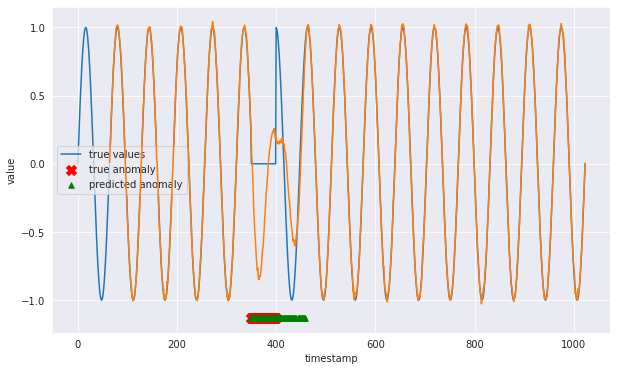

In [3]:
params = {
    "hidden_size1": 20,
    "hidden_size2": 20,
}
pipeline.train_evaluate(
    train_loader=train_loader,
    test_loader=test_loader,
    test_df=test_df,
    window_size=window_size,
    AnomalyDetector=LSTM_AD,
    model_name="LSTM-AD",
    n_epochs=10,
    verbose=1,
    plot_results=True,
    device=device,
    **params
)

In [4]:
None=1

SyntaxError: cannot assign to None (<ipython-input-4-c50d50884aea>, line 1)

In [3]:
epochs = 10
model = LSTM_AD(
    window_size=window_size,
    hidden_size1=20,
    hidden_size2=20,
    device=device
)
model.train(train_loader=train_loader, validation_loader=None,
            epochs=epochs, model_name="LSTM-AD",
            logdir="logs", verbose=1)

Epoch 0, dataset train: Loss - 0.421582, MSE - 0.421582
Epoch 1, dataset train: Loss - 0.086032, MSE - 0.086032
Epoch 2, dataset train: Loss - 0.001534, MSE - 0.001534
Epoch 3, dataset train: Loss - 0.000803, MSE - 0.000803
Epoch 4, dataset train: Loss - 0.000446, MSE - 0.000446
Epoch 5, dataset train: Loss - 0.000331, MSE - 0.000331
Epoch 6, dataset train: Loss - 0.000292, MSE - 0.000292
Epoch 7, dataset train: Loss - 0.000246, MSE - 0.000246
Epoch 8, dataset train: Loss - 0.000230, MSE - 0.000230
Epoch 9, dataset train: Loss - 0.000205, MSE - 0.000205


In [5]:
model.train_detector(train_loader)

Epoch 0, dataset train detector: Loss - 0.000187, MSE - 0.000187


Epoch 0, dataset evaluate detector: Loss - 0.022862, MSE - 0.022862


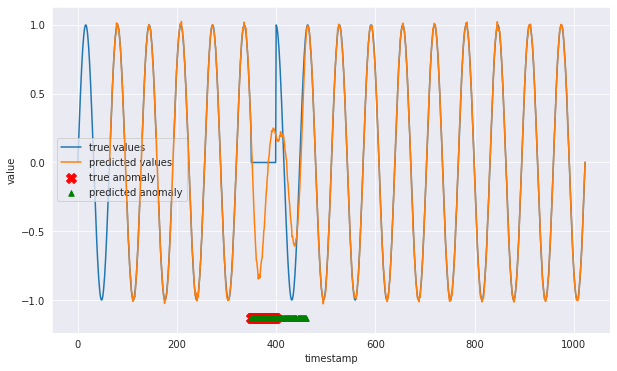

In [6]:
pipeline.show_results(
    model=model,
    validation_df=test_df,
    validation_loader=test_loader,
    window_size=window
)